In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns

Partimos el dataset de Kaggle en pedazos de 5000 elementos.

In [ ]:
words = pd.read_csv('../codigo/data/unigram_freq.csv')
words = pd.concat([words[['word']]]*10).reset_index()
words = words.reindex(np.random.permutation(words.index))[:500000]['word']
word_lists = np.array_split(words, 100)
for i in range(len(word_lists)):
    pd.DataFrame(word_lists[i]).to_csv(f'../input/Kaggle/500k/part_{i}', index=False, header=False)

Graficamos los tiempos.

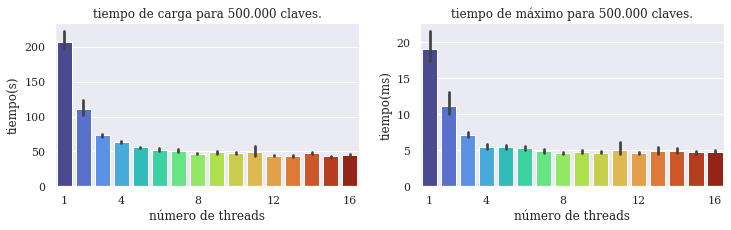

In [4]:
data = pd.read_csv('../output/threads/time500k.csv')
data = data.astype({'cargar':'float','maximo':'float'})
sns.set_theme(font='serif')
data['maximo'] *= 1000

fig, ax =plt.subplots(1,2,figsize=(12,3))
sns.barplot(x='threads', y='cargar', data=data, palette="turbo", ax=ax[0])
sns.barplot(x='threads', y='maximo', data=data, palette="turbo", ax=ax[1])
ax[0].set(xlabel="número de threads", ylabel="tiempo(s)")
ax[1].set(xlabel="número de threads", ylabel="tiempo(ms)")
ax[0].set(xticks=[0,3,7,11,15], yticks=[0,50,100,150,200])
ax[1].set(xticks=[0,3,7,11,15], yticks=[0,5,10,15,20])
ax[0].set(title="tiempo de carga para 500.000 claves.")
ax[1].set(title="tiempo de máximo para 500.000 claves.")
plt.savefig('../figuras/numero_threads.pdf', bbox_inches='tight')